In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import datetime
from datetime import date
from dateutil.relativedelta import relativedelta

In [2]:
df = pd.read_csv('Adsense.csv')
df.head()

,Month,Page views,Impressions,Clicks,Page RPM (INR),Impression RPM (INR),Active View Viewable,Estimated earnings (INR)
0,2018-06-20 - 2018-06-30,472,499,31,237.48,224.63,69.96%,112.09
1,2018-07-01 - 2018-07-31,226,595,11,306.66,116.48,74.39%,69.30
2,2018-08-01 - 2018-08-31,293,1201,2,46.81,11.42,76.02%,13.72
3,2018-09-01 - 2018-09-30,316,1283,1,126.09,31.06,73.72%,39.85
4,2018-10-01 - 2018-10-31,260,972,0,63.15,16.89,58.51%,16.42


In [3]:
l=list(df['Month'].str.split(' - '))
l

[['2018-06-20', '2018-06-30'],
 ['2018-07-01', '2018-07-31'],
 ['2018-08-01', '2018-08-31'],
 ['2018-09-01', '2018-09-30'],
 ['2018-10-01', '2018-10-31'],
 ['2018-11-01', '2018-11-30'],
 ['2018-12-01', '2018-12-31'],
 ['2019-01-01', '2019-01-31'],
 ['2019-02-01', '2019-02-28'],
 ['2019-03-01', '2019-03-31'],
 ['2019-04-01', '2019-04-30'],
 ['2019-05-01', '2019-05-31'],
 ['2019-06-01', '2019-06-30'],
 ['2019-07-01', '2019-07-31'],
 ['2019-08-01', '2019-08-31'],
 ['2019-09-01', '2019-09-30'],
 ['2019-10-01', '2019-10-31'],
 ['2019-11-01', '2019-11-30'],
 ['2019-12-01', '2019-12-31'],
 ['2020-01-01', '2020-01-31'],
 ['2020-02-01', '2020-02-14']]

In [4]:
df['start date']=df['Month']
for i,j in enumerate(l):
    df.loc[i,'start date']=l[i][0]

In [5]:
df

,Month,Page views,Impressions,Clicks,Page RPM (INR),Impression RPM (INR),Active View Viewable,Estimated earnings (INR),start date
0,2018-06-20 - 2018-06-30,472,499,31,237.48,224.63,69.96%,112.09,2018-06-20
1,2018-07-01 - 2018-07-31,226,595,11,306.66,116.48,74.39%,69.30,2018-07-01
2,2018-08-01 - 2018-08-31,293,1201,2,46.81,11.42,76.02%,13.72,2018-08-01
3,2018-09-01 - 2018-09-30,316,1283,1,126.09,31.06,73.72%,39.85,2018-09-01
4,2018-10-01 - 2018-10-31,260,972,0,63.15,16.89,58.51%,16.42,2018-10-01
5,2018-11-01 - 2018-11-30,160,705,0,45.37,10.30,66.90%,7.26,2018-11-01
6,2018-12-01 - 2018-12-31,526,1692,4,26.28,8.17,53.80%,13.82,2018-12-01
7,2019-01-01 - 2019-01-31,95,335,1,178.15,50.52,57.01%,16.92,2019-01-01
8,2019-02-01 - 2019-02-28,41,148,0,186.41,51.64,87.76%,7.64,2019-02-01
9,2019-03-01 - 2019-03-31,33,46,0,7.66,5.50,100.00%,0.25,2019-03-01


In [6]:
df['end date']=df['Month']
for i,j in enumerate(l):
    df.loc[i,'end date']=l[i][1]

In [7]:
df

,Month,Page views,Impressions,Clicks,Page RPM (INR),Impression RPM (INR),Active View Viewable,Estimated earnings (INR),start date,end date
0,2018-06-20 - 2018-06-30,472,499,31,237.48,224.63,69.96%,112.09,2018-06-20,2018-06-30
1,2018-07-01 - 2018-07-31,226,595,11,306.66,116.48,74.39%,69.30,2018-07-01,2018-07-31
2,2018-08-01 - 2018-08-31,293,1201,2,46.81,11.42,76.02%,13.72,2018-08-01,2018-08-31
3,2018-09-01 - 2018-09-30,316,1283,1,126.09,31.06,73.72%,39.85,2018-09-01,2018-09-30
4,2018-10-01 - 2018-10-31,260,972,0,63.15,16.89,58.51%,16.42,2018-10-01,2018-10-31
5,2018-11-01 - 2018-11-30,160,705,0,45.37,10.30,66.90%,7.26,2018-11-01,2018-11-30
6,2018-12-01 - 2018-12-31,526,1692,4,26.28,8.17,53.80%,13.82,2018-12-01,2018-12-31
7,2019-01-01 - 2019-01-31,95,335,1,178.15,50.52,57.01%,16.92,2019-01-01,2019-01-31
8,2019-02-01 - 2019-02-28,41,148,0,186.41,51.64,87.76%,7.64,2019-02-01,2019-02-28
9,2019-03-01 - 2019-03-31,33,46,0,7.66,5.50,100.00%,0.25,2019-03-01,2019-03-31


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
Month                       21 non-null object
Page views                  21 non-null int64
Impressions                 21 non-null int64
Clicks                      21 non-null int64
Page RPM (INR)              21 non-null float64
Impression RPM (INR)        21 non-null float64
Active View Viewable        21 non-null object
Estimated earnings (INR)    21 non-null float64
start date                  21 non-null object
end date                    21 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 1.7+ KB


In [9]:
df.drop(columns=['Month'],inplace=True)

In [10]:
df['end date'] = df['end date'].astype(str)
df['end date']= pd.to_datetime(df['end date']) 
df['start date'] = df['start date'].astype(str)
df['start date']= pd.to_datetime(df['start date']) 

In [11]:
df

,Page views,Impressions,Clicks,Page RPM (INR),Impression RPM (INR),Active View Viewable,Estimated earnings (INR),start date,end date
0,472,499,31,237.48,224.63,69.96%,112.09,2018-06-20,2018-06-30
1,226,595,11,306.66,116.48,74.39%,69.30,2018-07-01,2018-07-31
2,293,1201,2,46.81,11.42,76.02%,13.72,2018-08-01,2018-08-31
3,316,1283,1,126.09,31.06,73.72%,39.85,2018-09-01,2018-09-30
4,260,972,0,63.15,16.89,58.51%,16.42,2018-10-01,2018-10-31
5,160,705,0,45.37,10.30,66.90%,7.26,2018-11-01,2018-11-30
6,526,1692,4,26.28,8.17,53.80%,13.82,2018-12-01,2018-12-31
7,95,335,1,178.15,50.52,57.01%,16.92,2019-01-01,2019-01-31
8,41,148,0,186.41,51.64,87.76%,7.64,2019-02-01,2019-02-28
9,33,46,0,7.66,5.50,100.00%,0.25,2019-03-01,2019-03-31


In [12]:
#calculate the difference in dates
df['diff_days']=df['end date']-df['start date']
df

,Page views,Impressions,Clicks,Page RPM (INR),Impression RPM (INR),Active View Viewable,Estimated earnings (INR),start date,end date,diff_days
0,472,499,31,237.48,224.63,69.96%,112.09,2018-06-20,2018-06-30,10 days
1,226,595,11,306.66,116.48,74.39%,69.30,2018-07-01,2018-07-31,30 days
2,293,1201,2,46.81,11.42,76.02%,13.72,2018-08-01,2018-08-31,30 days
3,316,1283,1,126.09,31.06,73.72%,39.85,2018-09-01,2018-09-30,29 days
4,260,972,0,63.15,16.89,58.51%,16.42,2018-10-01,2018-10-31,30 days
5,160,705,0,45.37,10.30,66.90%,7.26,2018-11-01,2018-11-30,29 days
6,526,1692,4,26.28,8.17,53.80%,13.82,2018-12-01,2018-12-31,30 days
7,95,335,1,178.15,50.52,57.01%,16.92,2019-01-01,2019-01-31,30 days
8,41,148,0,186.41,51.64,87.76%,7.64,2019-02-01,2019-02-28,27 days
9,33,46,0,7.66,5.50,100.00%,0.25,2019-03-01,2019-03-31,30 days


In [13]:
df

,Page views,Impressions,Clicks,Page RPM (INR),Impression RPM (INR),Active View Viewable,Estimated earnings (INR),start date,end date,diff_days
0,472,499,31,237.48,224.63,69.96%,112.09,2018-06-20,2018-06-30,10 days
1,226,595,11,306.66,116.48,74.39%,69.30,2018-07-01,2018-07-31,30 days
2,293,1201,2,46.81,11.42,76.02%,13.72,2018-08-01,2018-08-31,30 days
3,316,1283,1,126.09,31.06,73.72%,39.85,2018-09-01,2018-09-30,29 days
4,260,972,0,63.15,16.89,58.51%,16.42,2018-10-01,2018-10-31,30 days
5,160,705,0,45.37,10.30,66.90%,7.26,2018-11-01,2018-11-30,29 days
6,526,1692,4,26.28,8.17,53.80%,13.82,2018-12-01,2018-12-31,30 days
7,95,335,1,178.15,50.52,57.01%,16.92,2019-01-01,2019-01-31,30 days
8,41,148,0,186.41,51.64,87.76%,7.64,2019-02-01,2019-02-28,27 days
9,33,46,0,7.66,5.50,100.00%,0.25,2019-03-01,2019-03-31,30 days


In [14]:
df.drop(columns=['start date'],inplace=True)
df.drop(columns=['end date'],inplace=True)

In [15]:
df

,Page views,Impressions,Clicks,Page RPM (INR),Impression RPM (INR),Active View Viewable,Estimated earnings (INR),diff_days
0,472,499,31,237.48,224.63,69.96%,112.09,10 days
1,226,595,11,306.66,116.48,74.39%,69.30,30 days
2,293,1201,2,46.81,11.42,76.02%,13.72,30 days
3,316,1283,1,126.09,31.06,73.72%,39.85,29 days
4,260,972,0,63.15,16.89,58.51%,16.42,30 days
5,160,705,0,45.37,10.30,66.90%,7.26,29 days
6,526,1692,4,26.28,8.17,53.80%,13.82,30 days
7,95,335,1,178.15,50.52,57.01%,16.92,30 days
8,41,148,0,186.41,51.64,87.76%,7.64,27 days
9,33,46,0,7.66,5.50,100.00%,0.25,30 days


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
Page views                  21 non-null int64
Impressions                 21 non-null int64
Clicks                      21 non-null int64
Page RPM (INR)              21 non-null float64
Impression RPM (INR)        21 non-null float64
Active View Viewable        21 non-null object
Estimated earnings (INR)    21 non-null float64
diff_days                   21 non-null timedelta64[ns]
dtypes: float64(3), int64(3), object(1), timedelta64[ns](1)
memory usage: 1.4+ KB


In [17]:
df['Active View Viewable'] = df['Active View Viewable'].astype(str)

In [18]:
new_list= []
for x in df["Active View Viewable"]:
    a=x.strip("%")
    print(x.strip("%"))
    new_list.append(float(a))
df['Active view list'] = new_list

69.96
74.39
76.02
73.72
58.51
66.90
53.80
57.01
87.76
100.00
60.09
62.66
85.08
94.80
100.00
85.34
100.00
100.00
75.47
96.51
100.00


In [19]:
df

,Page views,Impressions,Clicks,Page RPM (INR),Impression RPM (INR),Active View Viewable,Estimated earnings (INR),diff_days,Active view list
0,472,499,31,237.48,224.63,69.96%,112.09,10 days,69.96
1,226,595,11,306.66,116.48,74.39%,69.30,30 days,74.39
2,293,1201,2,46.81,11.42,76.02%,13.72,30 days,76.02
3,316,1283,1,126.09,31.06,73.72%,39.85,29 days,73.72
4,260,972,0,63.15,16.89,58.51%,16.42,30 days,58.51
5,160,705,0,45.37,10.30,66.90%,7.26,29 days,66.90
6,526,1692,4,26.28,8.17,53.80%,13.82,30 days,53.80
7,95,335,1,178.15,50.52,57.01%,16.92,30 days,57.01
8,41,148,0,186.41,51.64,87.76%,7.64,27 days,87.76
9,33,46,0,7.66,5.50,100.00%,0.25,30 days,100.00


In [20]:
new_list1= []
for days in df["diff_days"]:
    day = str(days)
    day_filter = day.split(" ")
    print(day_filter)
    new_list1.append(int(day_filter[0]))
df['days'] = new_list1   

['10', 'days', '00:00:00']
['30', 'days', '00:00:00']
['30', 'days', '00:00:00']
['29', 'days', '00:00:00']
['30', 'days', '00:00:00']
['29', 'days', '00:00:00']
['30', 'days', '00:00:00']
['30', 'days', '00:00:00']
['27', 'days', '00:00:00']
['30', 'days', '00:00:00']
['29', 'days', '00:00:00']
['30', 'days', '00:00:00']
['29', 'days', '00:00:00']
['30', 'days', '00:00:00']
['30', 'days', '00:00:00']
['29', 'days', '00:00:00']
['30', 'days', '00:00:00']
['29', 'days', '00:00:00']
['30', 'days', '00:00:00']
['30', 'days', '00:00:00']
['13', 'days', '00:00:00']


In [21]:
df.head()

,Page views,Impressions,Clicks,Page RPM (INR),Impression RPM (INR),Active View Viewable,Estimated earnings (INR),diff_days,Active view list,days
0,472,499,31,237.48,224.63,69.96%,112.09,10 days,69.96,10
1,226,595,11,306.66,116.48,74.39%,69.30,30 days,74.39,30
2,293,1201,2,46.81,11.42,76.02%,13.72,30 days,76.02,30
3,316,1283,1,126.09,31.06,73.72%,39.85,29 days,73.72,29
4,260,972,0,63.15,16.89,58.51%,16.42,30 days,58.51,30


In [22]:
df.drop(["diff_days","Active View Viewable"], axis=1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
Page views                  21 non-null int64
Impressions                 21 non-null int64
Clicks                      21 non-null int64
Page RPM (INR)              21 non-null float64
Impression RPM (INR)        21 non-null float64
Estimated earnings (INR)    21 non-null float64
Active view list            21 non-null float64
days                        21 non-null int64
dtypes: float64(4), int64(4)
memory usage: 1.4 KB


In [24]:
df.corr()

,Page views,Impressions,Clicks,Page RPM (INR),Impression RPM (INR),Estimated earnings (INR),Active view list,days
Page views,1.000000,0.650819,0.227937,-0.256554,0.027405,0.319144,0.073329,-0.063031
Impressions,0.650819,1.000000,-0.117983,-0.236347,-0.227792,0.211699,-0.290490,0.165889
Clicks,0.227937,-0.117983,1.000000,0.508559,0.883812,0.772208,-0.072451,-0.729063
Page RPM (INR),-0.256554,-0.236347,0.508559,1.000000,0.802129,0.691996,-0.142238,-0.264496
Impression RPM (INR),0.027405,-0.227792,0.883812,0.802129,1.000000,0.871241,-0.054497,-0.595134
Estimated earnings (INR),0.319144,0.211699,0.772208,0.691996,0.871241,1.000000,-0.064964,-0.476038
Active view list,0.073329,-0.290490,-0.072451,-0.142238,-0.054497,-0.064964,1.000000,-0.087842
days,-0.063031,0.165889,-0.729063,-0.264496,-0.595134,-0.476038,-0.087842,1.000000


In [25]:
x = df.drop("Estimated earnings (INR)", axis=1)
y = df["Estimated earnings (INR)"]

In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
Page views              21 non-null int64
Impressions             21 non-null int64
Clicks                  21 non-null int64
Page RPM (INR)          21 non-null float64
Impression RPM (INR)    21 non-null float64
Active view list        21 non-null float64
days                    21 non-null int64
dtypes: float64(3), int64(4)
memory usage: 1.2 KB


In [27]:
'''from sklearn.preprocessing import MinMaxScaler
for col in x:
    mm = MinMaxScaler()
    x[col] = mm.fit_transform([[col]])'''

'from sklearn.preprocessing import MinMaxScaler\nfor col in x:\n    mm = MinMaxScaler()\n    x[col] = mm.fit_transform([[col]])'

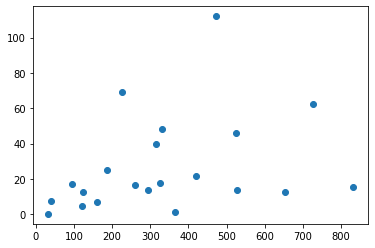

In [28]:
plt.scatter(x["Page views"],y)
plt.show()

In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
lr = LinearRegression()
sel = SelectFromModel(LinearRegression())
sel.fit(x_train,y_train)
#y_pred = sel.predict(x_test)
#print(r2_score(y_test,y_pred))

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [32]:
sel.get_support()

array([False, False,  True, False,  True, False, False])

In [33]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

2

In [34]:
print(selected_feat)

Index(['Clicks', 'Impression RPM (INR)'], dtype='object')


In [35]:
x = df[selected_feat]
y = df["Estimated earnings (INR)"]

In [41]:
while score < 30:
    from sklearn.linear_model import LinearRegression
    from sklearn.feature_selection import SelectFromModel
    lr = LinearRegression()
    sel = SelectFromModel(LinearRegression())
    sel.fit(x_train,y_train)
    sel.get_support()
    selected_feat= x_train.columns[(sel.get_support())]
    len(selected_feat)
    score = 0

    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=1)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred =lr.predict(x_test)
    score = r2_score(y_pred,y_test)
    print(score)

-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.52366527683

-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.52366527683

-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.52366527683

-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.52366527683

-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.52366527683

-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.52366527683

-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.52366527683

-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.5236652768358
-7.52366527683

KeyboardInterrupt: 